In [13]:
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.random import uniform

In [14]:
model =  load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2_files/')

In [15]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
 
replace2linear = ReplaceToLinear()

In [16]:
from tf_keras_vis.utils.scores import CategoricalScore
scores = CategoricalScore([0,1,2])
image_titles = ["Storm", "Yoda", "Darth"] #CORRIGIR
seed_input = uniform((3, 256, 256, 3), 0, 255)

In [17]:
from tf_keras_vis.activation_maximization import ActivationMaximization
 
activation_maximization = ActivationMaximization(model,
                                                 model_modifier=replace2linear,
                                                 clone=True)

In [25]:
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger
activations = activation_maximization(scores, steps = 4000,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])

4000/4000 [==============================] - 944s 236ms/step - Score: 6214.0972 - TotalVariation2D: 6.7604 - Norm: 26.7591


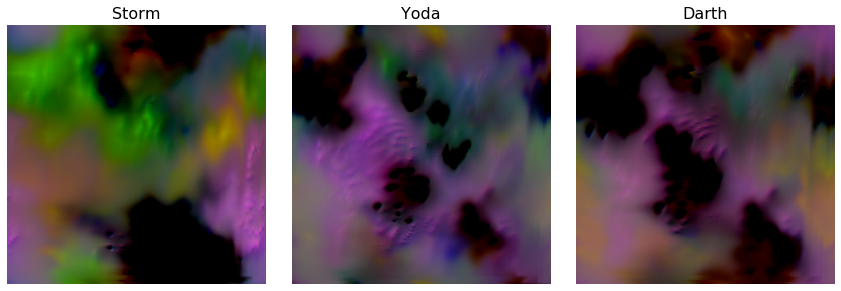

In [26]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()